# Introduction to Machine Learning
---
Written by Liam Thorne for SWiCS & WiE Python Data-Analysis Sessions (2023)

## Overview

Machine learning is the use of numerical models to analyse data, identify patterns and predict new data based on these learned patterns. In this way, machine learning models simulate functions of the real world.

Machine learning models vary greatly in the way they work, the data they use and the way that they learn but the fundamental requirements for training any machine learning model are:

1. A model with parameters to update
2. An objective function
3. Training samples

The model is a mathematical structure for which parameters are updated to fit the training data. An objective function indicates the error between the value the model predicted and the correct value. Training samples define the problem being trained on and are used to update the model parameters.

Although there are many variations of model class; too many to cover in this notebook. The two common archetypes which most models fit into are regression and classification.

## Regression

A regression problem is one where a continuous value is predicted. In the previous notebook, we covered linear regression which is arguable one of the simplest machine learning algorithms. Based on the data $X$, we found the optimal parameters $m$ and $c$ for the function $y = mx + c$ such that we minimised the root mean square error (RMSE):

$$
RMSE(m, c) = \sum^{n}_{i=1}(y_i - (mx_i + c))^2
$$

Our model was Linear Regression, our objective function was RMSE and our training data was olympic world record times.

## Question 1 - Linear Regression



## Classification

Classification predicts a single, predefined class from input data e.g. is this picture a dog or a cat? 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Neural Networks

The majority of models today are deep neural networks instead of the statistical models we have covered so far. Neural networks are collections of simple mathematical operators in layers

## Question - Sigmoid

The sigmoid function is the activation function used in logistic regression. This normalises the activations of the preceding layer to be between -1 and 1. Any values larger than 0 consider the neuron activated, and less than implies no activation i.e. 

$$
\text{decision}(x) =
\begin{cases}
1 & P(y=1|x) > 0.5 \\
0 & \text{otherwise}
\end{cases}
$$

i) Define a function named `sigmoid` with one parameter `z`, impelmenting the following mathematical function.

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

ii) Plot the function using matplotlib. 

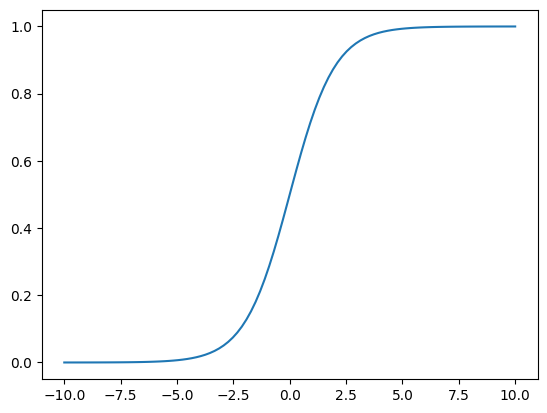

In [2]:
# Answer Here
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

x = np.linspace(-10, 10, 100)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

## Question - Logistic Loss

The objective function used by logistic regression is logistic loss. Logistic regression works on the idea of log odds (logit).

$$
log(\frac{\text{Prob. of desired outcome}}{\text{Prob. of undesired outcome}}) = log(\frac{p(x)}{1 - p(x)})
$$


`Note:` log used in this notation is the natural logarithm. The following is the logistic loss function:

$$
J(\Theta) = - \frac{1}{N} \sum^{N}_{i=1} y_i log(p(y_i)) + (1 - y_i) log(1 - p(y_i))
$$

For computational efficiency, all calculations are conducted as matrix operations. The matrix formulation of this expression is:

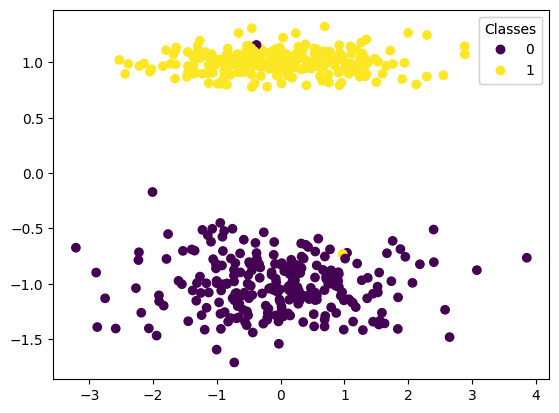

In [120]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=100)

fig, ax = plt.subplots()

scatter = ax.scatter(X[:, 0], X[:, 1], marker='o', c=y)
legend = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend)

plt.show()

$$
Xw =
\begin{bmatrix}
1 & x_{1, 1} & \cdots & x_{1, m} \\
\vdots & \vdots & & \vdots \\
1 & x_{1, m} & \cdots & x_{n, m}
\end{bmatrix}

\cdot

\begin{bmatrix}
b \\
w_1 \\
\vdots \\
w_m
\end{bmatrix}
$$

In [121]:
np.random.seed(0)
X = np.hstack([np.ones((X.shape[0], 1)), X])
w = np.random.randn(X.shape[1])

print(y.shape, X.shape, w.shape)
# Answer Here
z = X @ w

(500,) (500, 3) (3,)


In [104]:
def logit_loss(z, y, epsilon=1e-13):
    return -np.mean(y * np.log(sigmoid(z) + epsilon) + (1 - y) * np.log(1 - sigmoid(z) + epsilon))

logit_loss(z, y)

0.6194115575431252

## Gradient Descent

Often in machine learning, we deal with much more data than can be fit into memory in one go. This means, even if an exact solution can be theoretically evaluated, we cannot practically perform the calculation; as is often the case with logistic regression. 

In [122]:
def gradient_descent(X, y, w, lr=0.01, epochs=1000):
    losses = []
    for epoch in range(epochs):
        z = X @ w
        loss = logit_loss(z, y)
        losses.append(loss)
        w = w - lr * (X.T @ (sigmoid(z) - y))
    return w, losses

w, losses = gradient_descent(X, y, w)
w

array([-0.37032822,  0.56842194,  6.08256217])

## Boundary

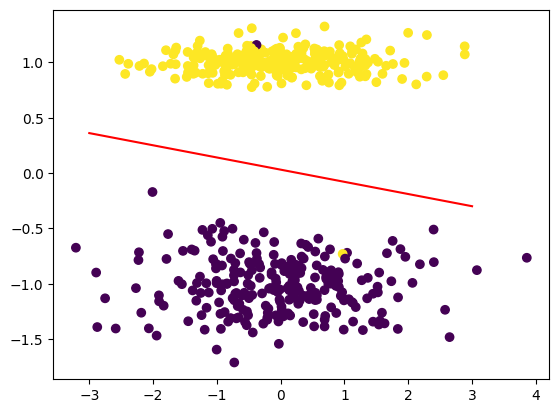

In [127]:
bias = w[0]
weights = w[1:]

fig, ax = plt.subplots()
x_space = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
f_x = -(bias + weights[0] * x_space) / weights[1]
plt.scatter(X[:, 1], X[:, 2], marker='o', c=y)
plt.plot(x, f_x, color='red')
plt.show()

In [79]:
def predict(X, w):
    return np.round(sigmoid(X @ w))

x_test = np.array([[1, 1], [-1, 0], [0, 3]])
y_pred = predict(x_test, w)
y_pred

array([1., 0., 1.])